In [3]:
import pyreadr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

In [4]:
data = pyreadr.read_r('syntdata1.RDS')
df = data[None]
#rescaling -> not mandatory for EM since it allowws elliptic clusters
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled

,0,1
0,0.214503,0.244611
1,0.111409,0.171936
2,0.160825,0.327017
3,0.175192,0.265707
4,0.163017,0.229353
...,...,...
146,0.888934,0.333047
147,0.777769,0.468284
148,0.855564,0.367697
149,0.677141,0.141217


In [83]:
def SSQ(X, kmeans):
    centers = kmeans.cluster_centers_
    ssq = np.zeros(len(centers))
    for cc in range(len(centers)):
        mask = (kmeans.labels_ == cc)
        ssq[cc] += np.square(X.iloc[mask].values - centers[cc]).sum()
    return ssq

[1.8764122699478565, 11.374593377079584]
1 [0.20879771 0.36539676] [1.8764122699478565, 0.20879770575776788, 0.36539675738431315]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
0
2 [0.28416623 0.88942863] [0.20879770575776788, 0.36539675738431315, 0.2841662338576145, 0.8894286262097288]
here 2 0.8894286262097288 0.8894286262097288
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 0 0 3 3 0 3 3 0
 0 0 3 0 0 0 0 3 0 0 0 0 0 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 0 3 0 3 0 3 0 0 0
 0 3 0]
3
3 [0.0582571  0.45196581] [0.20879770575776788, 0.36539675738431315, 0.2841662338576145, 0.05825

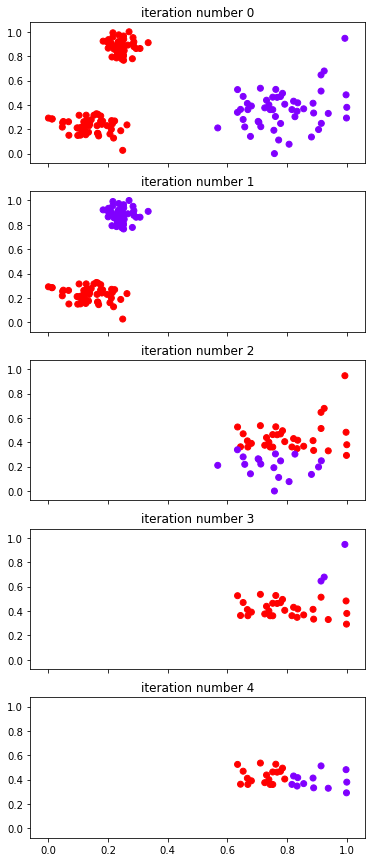

In [199]:
max_iter = 5    # number of clusters at the end
indexes = np.zeros(len(df[0]))  # indexes set: the data to work on for clustering
h_cluster = [] # cluster hierarchy
ssq = [] # ssq, each iteration it will focus on the cluster with the highest ssq 
ix_cluster = 0 # index of the cluster that will be splitted
seed     = 123 # seed for kmeans
fig, axs = plt.subplots(max_iter, sharex=True, sharey=True, figsize = (6,max_iter*3))

res = KMeans(n_clusters=2).fit(df_scaled)
ssq.extend(SSQ(df_scaled, res))
print(ssq)
worst = np.argmax(ssq)
ssq.pop(worst)
mask = (res.labels_ == worst)
indexes = res.labels_ if worst==0 else - res.labels_ + 1
ix = 1
#print(indexes)
axs[0].scatter(df_scaled[0].values, df_scaled[1].values, c=res.labels_, cmap='rainbow')
axs[0].set_title('iteration number 0')
ii = 1
while(ii < max_iter):
    x = df_scaled.iloc[mask]
    res = KMeans(n_clusters=2, random_state=seed).fit(x)
    bad = np.argmax(SSQ(x, res))
    ssq.extend(SSQ(x, res))
    print(ii, SSQ(x, res), ssq)
    worst = np.argmax(ssq)
    tmp_label = np.zeros(len(res.labels_))
    tmp_label[np.where(res.labels_ != bad)[0]] = ii +1
    if max(ssq) == max(SSQ(x, res)):
        print('here', ii, max(ssq), max(SSQ(x, res)))
        tmp_label[np.where(res.labels_ == bad)[0]] = 0 
        indexes[mask] = tmp_label
    else:
        tmp_label[np.where(res.labels_ == bad)[0]] = ix
        indexes[np.where(indexes == ix)[0]] = 0
        indexes[mask] = tmp_label
    mask = (indexes == 0)
    ssq.pop(worst)
    print(indexes)
    print(worst)
    axs[ii].scatter(x[0], x[1], c=res.labels_, cmap='rainbow')
    axs[ii].set_title('iteration number ' + str(ii))
    ii += 1

In [90]:
kmeans = KMeans(n_clusters=2, random_state=seed).fit(df_scaled)
#ssq.append(SSQ(df_scaled, res))
centers = kmeans.cluster_centers_
ssq = np.zeros(len(centers))
for cc in range(len(centers)):
    mask = (kmeans.labels_ == cc)
    print(centers[cc])
    ssq[cc] += np.square(df_scaled.iloc[mask].values - centers[cc]).sum()
    print(ssq)

[0.78562108 0.36280449]
[1.87641227 0.        ]
[0.19137907 0.55460423]
[ 1.87641227 11.37459338]
